In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()



# 그래프 기본 설정
#plt.rcParams['font.family'] = 'NanumGothic' #리눅스용
plt.rcParams['font.family'] = 'Malgun Gothic' #윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


#label_encoder
from sklearn.preprocessing import LabelEncoder

#다중공산성을 봐봅시다
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#파일 경로
file_dir = "C:/Users/sherm/Desktop/workspace/likeLion_final_project/data/train/0.종합본/"

In [57]:
df=pd.read_parquet(file_dir + "train_잔액정보_append.parquet")

### 기본 정보들

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800000 entries, 0 to 4799999
Data columns (total 83 columns):
 #   Column             Dtype  
---  ------             -----  
 0   기준년월               int64  
 1   ID                 object 
 2   잔액_일시불_B0M         int64  
 3   잔액_할부_B0M          int64  
 4   잔액_현금서비스_B0M       int64  
 5   잔액_리볼빙일시불이월_B0M    int64  
 6   잔액_리볼빙CA이월_B0M     int64  
 7   잔액_카드론_B0M         int64  
 8   월중평잔_일시불_B0M       int64  
 9   월중평잔_할부_B0M        int64  
 10  월중평잔_CA_B0M        int64  
 11  카드론잔액_최종경과월        int64  
 12  연체일자_B0M           float64
 13  연체잔액_B0M           int64  
 14  연체잔액_일시불_B0M       int64  
 15  연체잔액_할부_B0M        int64  
 16  연체잔액_현금서비스_B0M     int64  
 17  연체잔액_카드론_B0M       int64  
 18  연체잔액_대환론_B0M       int64  
 19  잔액_현금서비스_B1M       int64  
 20  잔액_현금서비스_B2M       int64  
 21  잔액_카드론_B1M         int64  
 22  잔액_카드론_B2M         int64  
 23  잔액_카드론_B3M         int64  
 24  잔액_카드론_B4M         int64  
 25  잔액_카드론_B5M        

In [59]:
encoder=LabelEncoder()
df['Segment']=encoder.fit_transform(df['Segment'])

- 유일한 범주형 변수는 라벨링 걸어주기

In [60]:
df_temp=df.drop(['기준년월','ID'],axis=1)

,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,카드론잔액_최종경과월,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
0,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
1,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
2,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
3,2565,2390,0,0,0,0,4090,2553,0,0,...,2677,0,2830,0,2736,0,0,0,0,4
4,2565,2390,0,0,0,0,4090,2553,0,0,...,2677,0,2830,0,2736,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4799996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4799997,1110,4093,0,0,0,0,637,2780,0,0,...,2415,0,0,0,6558,0,0,0,0,4
4799998,1110,4093,0,0,0,0,637,2780,0,0,...,2415,0,0,0,6558,0,0,0,0,4


In [62]:
df_temp["연체일수_최근"].value_counts()

연체일수_최근
0    4792808
1       7192
Name: count, dtype: int64

In [51]:
display(df[df['연체일수_최근'] == -999999][['연체원금_최근', '최종연체회차']].value_counts())

연체원금_최근  최종연체회차
0        -99       3219623
          0        1546289
3006     -99            18
3112     -99            18
3394     -99            18
                    ...   
6641      0              1
6647      0              1
6754     -99             1
7207     -99             1
4525     -99             1
Name: count, Length: 676, dtype: int64

In [41]:
temp=df_temp.var()[df_temp.var() < 1e-3].index.to_list()

In [7]:
temp

['카드론잔액_최종경과월',
 '최종연체개월수_R15M',
 'RV잔액이월횟수_R6M',
 'RV잔액이월횟수_R3M',
 '연체잔액_일시불_해외_B0M',
 '연체잔액_RV일시불_해외_B0M',
 '연체잔액_할부_해외_B0M',
 '연체잔액_CA_해외_B0M']

In [43]:
df['연체원금_최근']

0         -999999
1         -999999
2         -999999
3         -999999
4         -999999
            ...  
4799995   -999999
4799996   -999999
4799997   -999999
4799998   -999999
4799999   -999999
Name: 연체일수_최근, Length: 4800000, dtype: int64

In [8]:
df_temp.drop(temp, axis=1,inplace=True)

In [9]:
drop_list=[]
for i in list(df_temp.columns):
    if df_temp[i].isna().sum() > 0:
        drop_list.append(i)
        print(i)

연체일자_B0M


In [10]:
df_temp.drop(drop_list, axis=1,inplace=True)

### EDA

#### VIF

X = df_temp.drop('Segment',axis=1)
X_const = add_constant(X)
vif_df_01 = pd.DataFrame()
vif_df_01["feature"] = X.columns
vif_df_01["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def calculate_vif_fast(X):
    vif_data = []
    for i in range(X.shape[1]):
        y = X.iloc[:, i]
        X_others = X.drop(X.columns[i], axis=1)
        model = LinearRegression().fit(X_others, y)
        r_squared = model.score(X_others, y)
        vif = 1 / (1 - r_squared) if r_squared < 1 else np.inf
        vif_data.append(vif)
    return pd.DataFrame({'variable': X.columns, 'VIF': vif_data})


In [30]:
X = df_temp.drop('Segment',axis=1)
X_const = add_constant(X)
temp=calculate_vif_fast(X_const)

In [34]:
temp.nlargest(60, "VIF")

,variable,VIF
0,const,inf
10,연체잔액_B0M,4.881283e+08
2,잔액_할부_B0M,4.382848e+08
42,잔액_할부_무이자_B0M,2.965835e+08
13,연체잔액_현금서비스_B0M,2.179988e+08
...,...,...
62,평잔_6M,1.358490e+01
54,평잔_일시불_해외_3M,1.335796e+01
26,잔액_일시불_B2M,1.180767e+01
25,잔액_일시불_B1M,1.103138e+01


In [37]:
drop_list=list(temp.nlargest(60, "VIF")['variable'])[1:]
df_drop=df_temp.drop(drop_list, axis=1)
df_drop

,잔액_리볼빙CA이월_B0M,연체원금_B2M,연체일수_최근,최종연체회차,매각잔액_B1M,잔액_할부_해외_B0M,연체잔액_RV일시불_B0M,연체잔액_CA_B0M,평잔_할부_해외_3M,평잔_CA_해외_3M,평잔_할부_해외_6M,평잔_CA_해외_6M,Segment
0,0,0,-999999,0,0,0,0,0,0,0,0,0,3
1,0,0,-999999,0,0,0,0,0,0,0,0,0,3
2,0,0,-999999,0,0,0,0,0,0,0,0,0,3
3,0,0,-999999,0,0,0,0,0,0,0,0,0,4
4,0,0,-999999,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799995,0,0,-999999,-99,0,0,0,0,0,0,0,0,4
4799996,0,0,-999999,-99,0,0,0,0,0,0,0,0,4
4799997,0,0,-999999,-99,0,0,0,0,0,0,0,0,4
4799998,0,0,-999999,-99,0,0,0,0,0,0,0,0,4


In [ ]:
vif_df

#### 1D

#### 잔액_일시불_B0M
 - 잔액_일시불(당원)

In [64]:
df_temp['잔액_일시불_B0M'].describe()

count    4.800000e+06
mean     3.358514e+03
std      6.356762e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.327000e+03
75%      3.944000e+03
max      2.227670e+05
Name: 잔액_일시불_B0M, dtype: float64

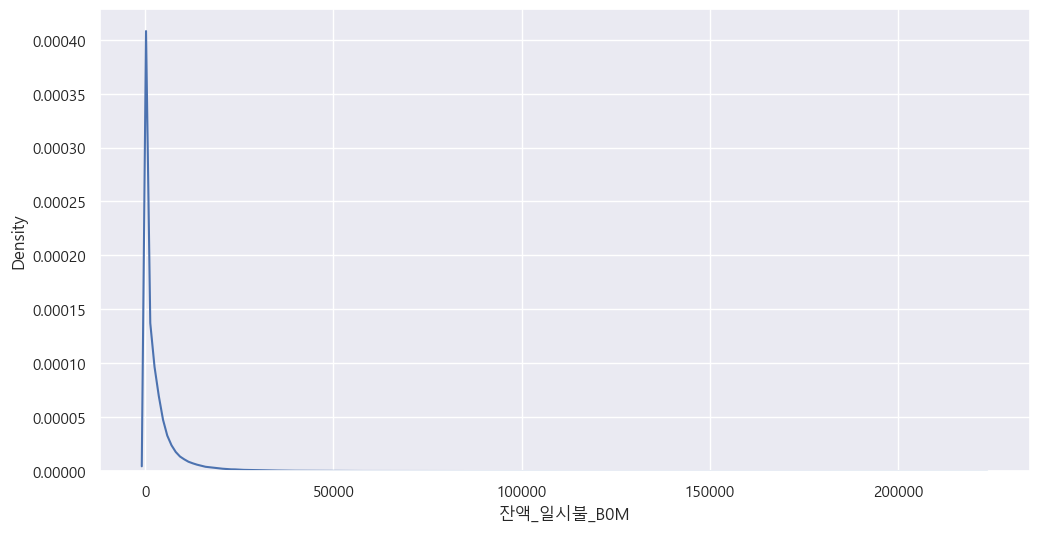

In [66]:
sns.kdeplot(x=df_temp['잔액_일시불_B0M'])
plt.show()

<Axes: xlabel='잔액_일시불_B0M'>

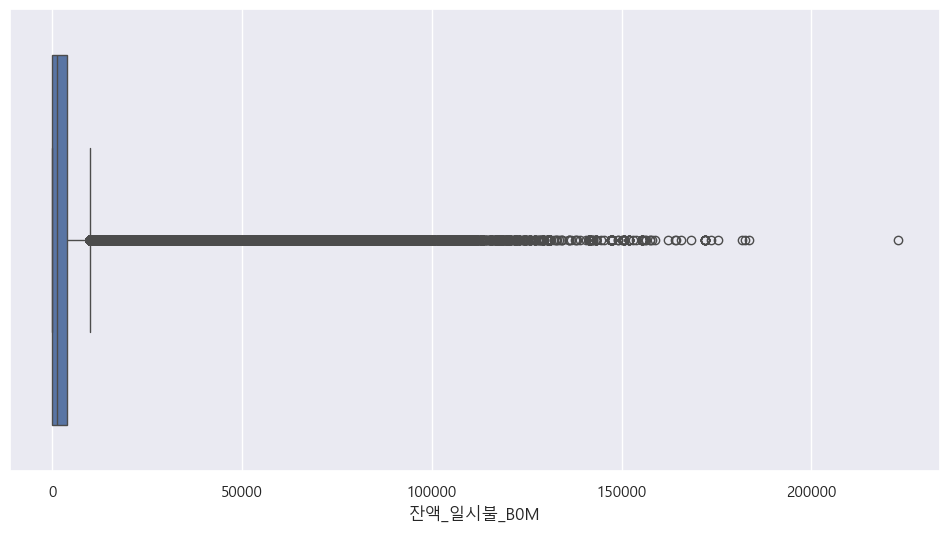

In [68]:
sns.boxplot(x=df_temp['잔액_일시불_B0M'])

#### 잔액_할부_B0M
- 잔액_할부(당월)

In [75]:
df_temp['잔액_할부_B0M'].value_counts().sort_values()

잔액_할부_B0M
32688          1
21083          1
25901          1
26654          1
28473          1
          ...   
1809         617
1574         626
1785         628
1921         643
0        3138759
Name: count, Length: 25495, dtype: int64

In [69]:
df_temp['잔액_할부_B0M'].describe()

count    4.800000e+06
mean     1.655338e+03
std      3.671084e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.022000e+03
max      7.146500e+04
Name: 잔액_할부_B0M, dtype: float64

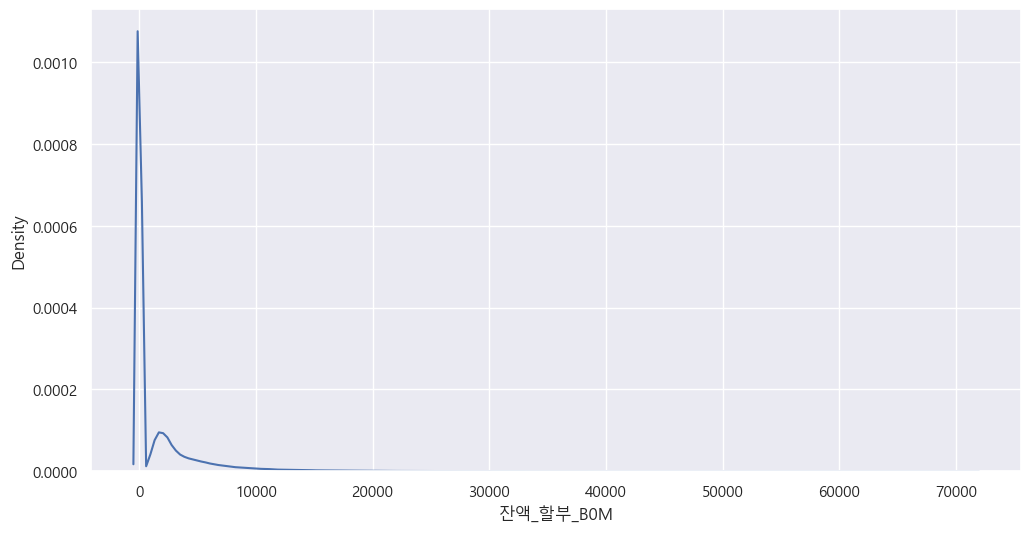

In [74]:
sns.kdeplot(x=df_temp['잔액_할부_B0M'])
plt.show()

<Axes: xlabel='잔액_할부_B0M'>

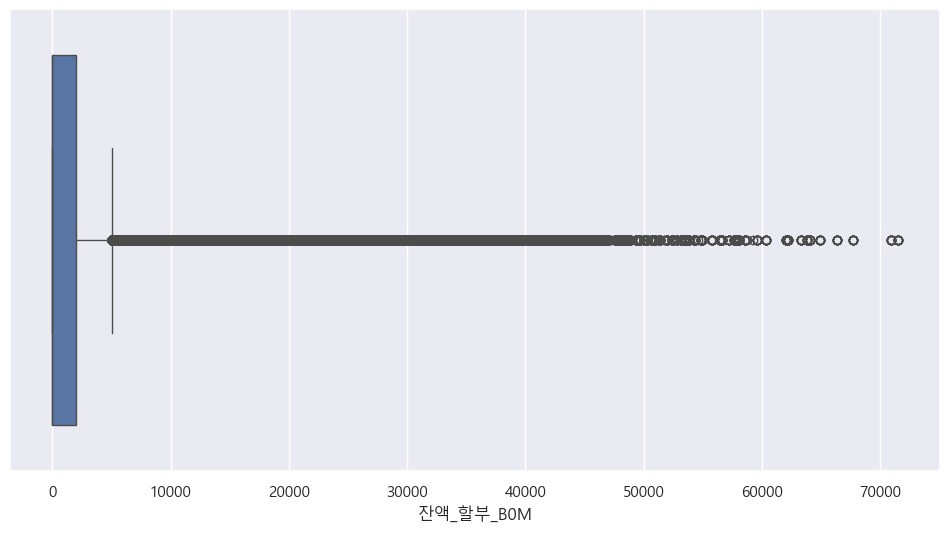

In [72]:
sns.boxplot(x=df_temp['잔액_할부_B0M'])

#### 잔액_현금서비스_B0M
- 잔액_현금서비스(당월)

In [80]:
df_temp['잔액_현금서비스_B0M'].value_counts()

잔액_현금서비스_B0M
0        4548260
9032         102
8077          85
6833          82
6160          77
          ...   
20248          1
4883           1
43771          1
33005          1
31696          1
Name: count, Length: 25915, dtype: int64

In [77]:
df_temp['잔액_현금서비스_B0M'].describe()

count    4.800000e+06
mean     7.012327e+02
std      3.564569e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.217200e+04
Name: 잔액_현금서비스_B0M, dtype: float64

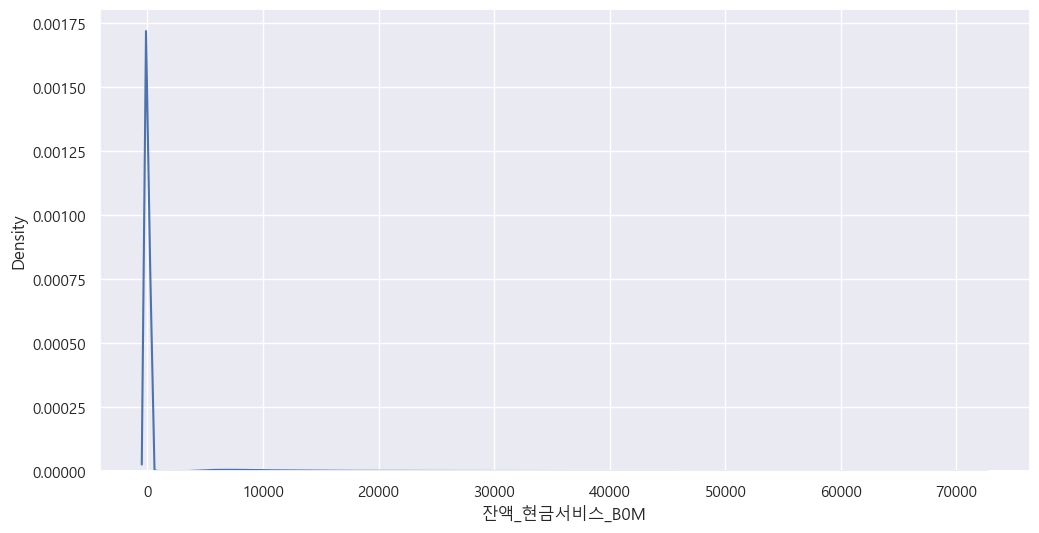

In [78]:
sns.kdeplot(x=df_temp['잔액_현금서비스_B0M'])
plt.show()

<Axes: xlabel='잔액_현금서비스_B0M'>

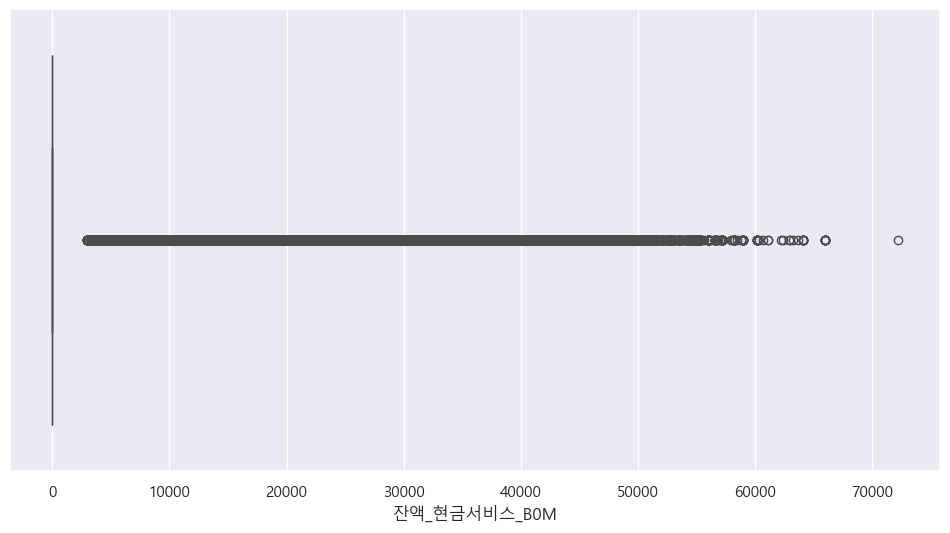

In [79]:
sns.boxplot(x=df_temp['잔액_현금서비스_B0M'])

#### 잔액_총합_B0M(파생변수)
- 잔액_전체이용량(당월)

In [81]:
df_temp["잔액_총합_B0M"]=df_temp["잔액_일시불_B0M"]+df_temp["잔액_할부_B0M"]+df_temp['잔액_현금서비스_B0M']

In [82]:
df_temp['잔액_총합_B0M'].value_counts()

잔액_총합_B0M
0        1192162
9           3503
10          3391
11          3326
8           3028
          ...   
68294          1
58292          1
55201          1
45067          1
97236          1
Name: count, Length: 51813, dtype: int64

In [83]:
df_temp['잔액_총합_B0M'].describe()

count    4.800000e+06
mean     5.715085e+03
std      8.842774e+03
min      0.000000e+00
25%      9.000000e+00
50%      2.500000e+03
75%      7.496000e+03
max      2.341190e+05
Name: 잔액_총합_B0M, dtype: float64

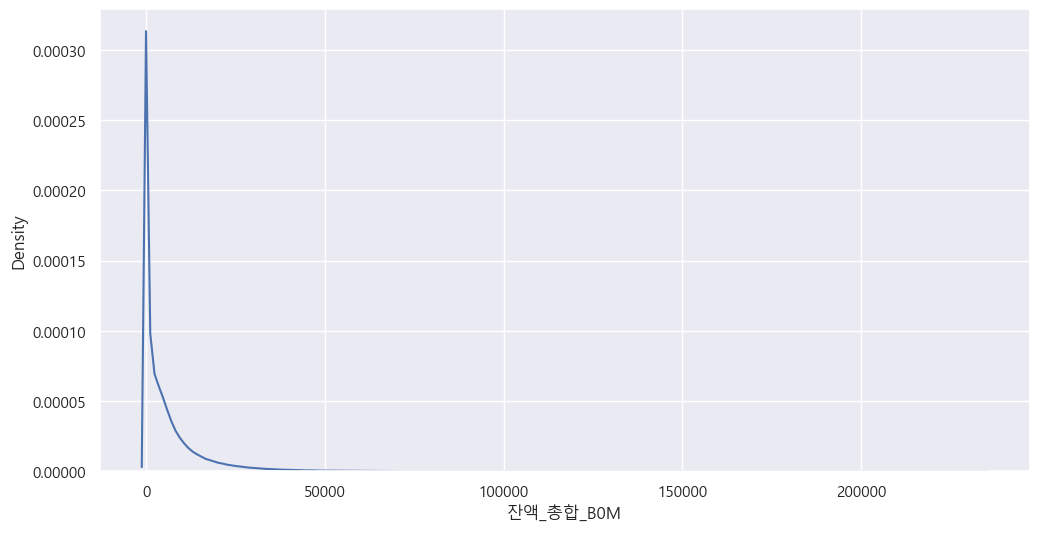

In [84]:
sns.kdeplot(x=df_temp['잔액_총합_B0M'])
plt.show()

<Axes: xlabel='잔액_총합_B0M'>

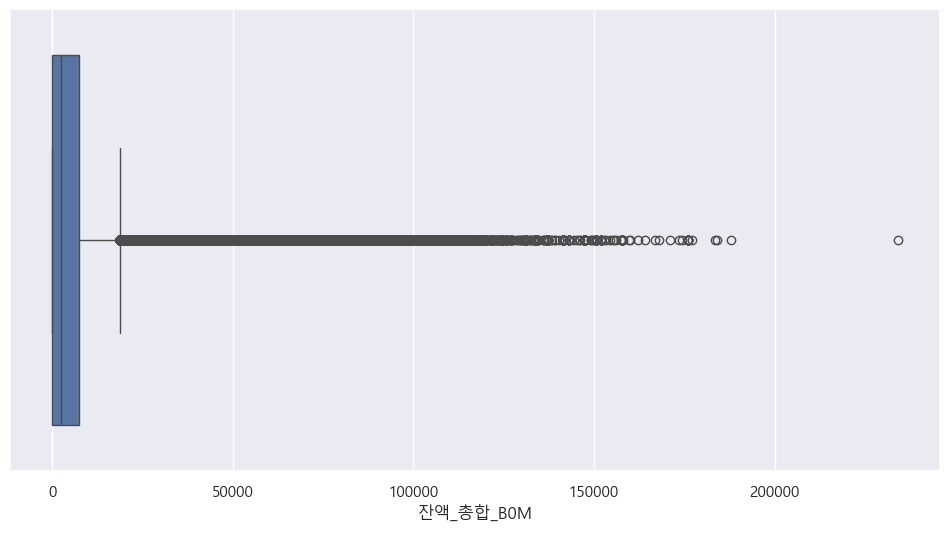

In [85]:
sns.boxplot(x=df_temp['잔액_총합_B0M'])

#### 잔액_리볼빙일시불이월_B0M
- 잔액 리볼빙 일시불 이월 (당월)

In [87]:
df_temp['잔액_리볼빙일시불이월_B0M'].value_counts()

잔액_리볼빙일시불이월_B0M
0        4665508
8086          64
11419         59
12877         55
8983          51
          ...   
20633          1
19544          1
18715          1
17746          1
20115          1
Name: count, Length: 15115, dtype: int64

In [88]:
df_temp['잔액_리볼빙일시불이월_B0M'].describe()

count    4.800000e+06
mean     3.319664e+02
std      2.064152e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.341600e+04
Name: 잔액_리볼빙일시불이월_B0M, dtype: float64

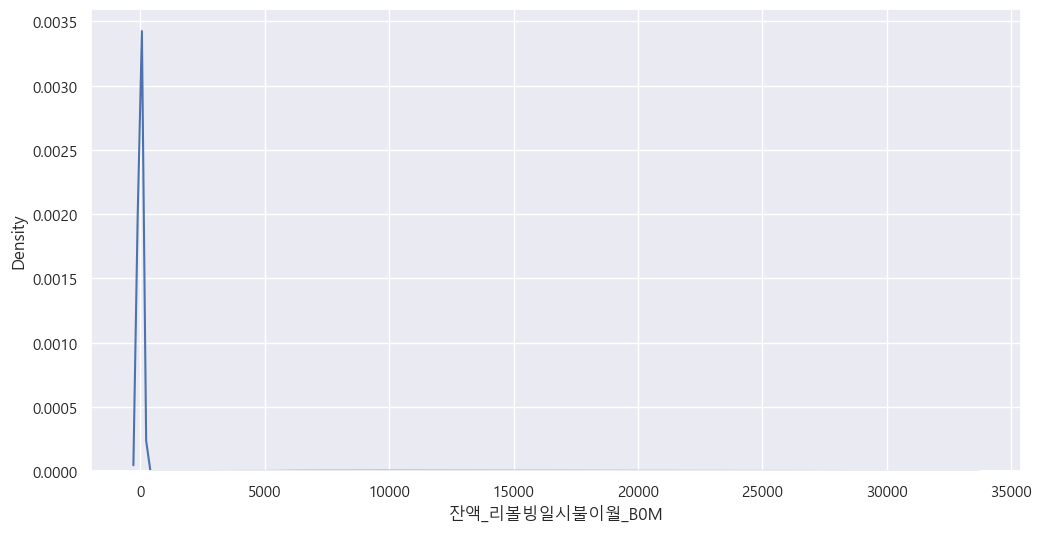

In [89]:
sns.kdeplot(x=df_temp['잔액_리볼빙일시불이월_B0M'])
plt.show()

<Axes: xlabel='잔액_리볼빙일시불이월_B0M'>

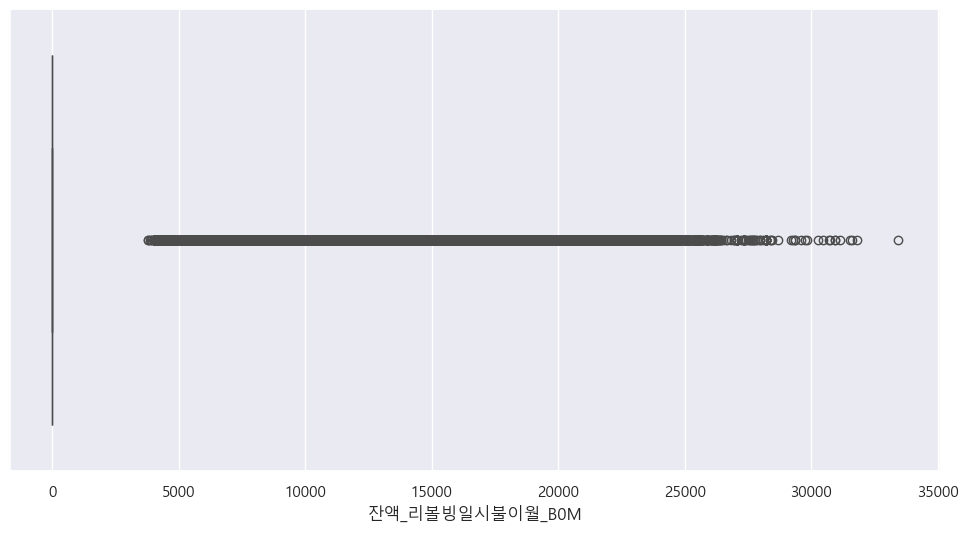

In [90]:
sns.boxplot(x=df_temp['잔액_리볼빙일시불이월_B0M'])

#### 잔액_리볼빙CA이월_B0M
- 잔액 리볼빙 현금서비스 이월 (당월)

In [91]:
df_temp['잔액_리볼빙CA이월_B0M'].value_counts()

잔액_리볼빙CA이월_B0M
0        4797114
5858          28
26566         28
26650         28
5878          27
          ...   
15125          1
3446           1
26304          1
15865          1
10565          1
Name: count, Length: 621, dtype: int64

In [92]:
df_temp['잔액_리볼빙CA이월_B0M'].describe()

count    4.800000e+06
mean     1.158504e+01
std      5.276501e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.695400e+04
Name: 잔액_리볼빙CA이월_B0M, dtype: float64

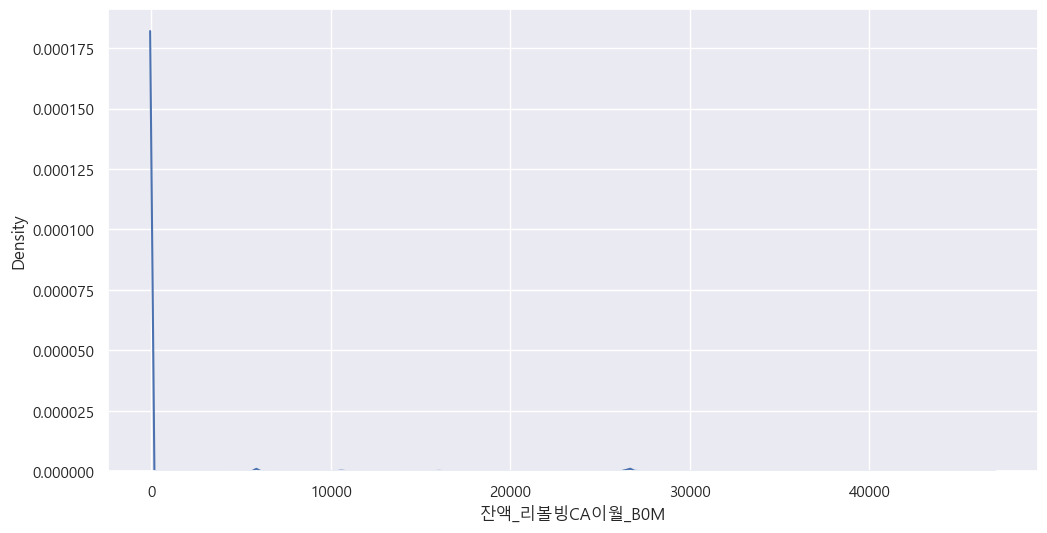

In [93]:
sns.kdeplot(x=df_temp['잔액_리볼빙CA이월_B0M'])
plt.show()

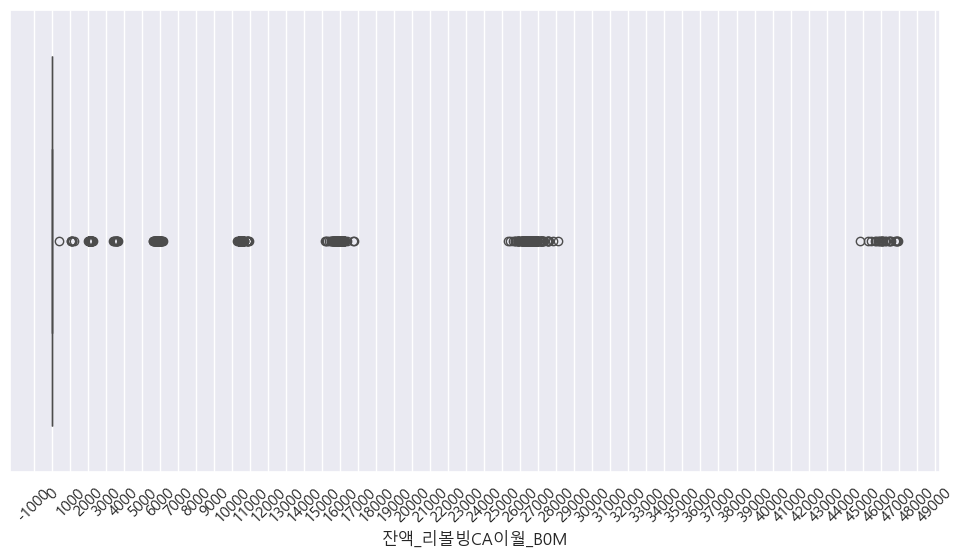

In [106]:
sns.boxplot(x=df_temp['잔액_리볼빙CA이월_B0M'])
plt.xticks(range(-1000,50000,1000),rotation=45)
plt.show()

#### 리볼빙CA_그룹(파생변수)
- 결측치가 그룹을 지어서 나타나는 것을 보고 만듦

In [107]:
df_temp['리볼빙CA_그룹'] = pd.cut(
    df_temp['잔액_리볼빙CA이월_B0M'],
    bins=[-1, 1, 1000, 3000, 4000, 10000, 14000, 20000, 30000, 50000],
    labels=False
)
df_temp['리볼빙CA_그룹'].value_counts()

리볼빙CA_그룹
0    4797114
7       1681
4        621
5        369
6        134
2         45
8         24
3         11
1          1
Name: count, dtype: int64

<Axes: xlabel='리볼빙CA_그룹', ylabel='count'>

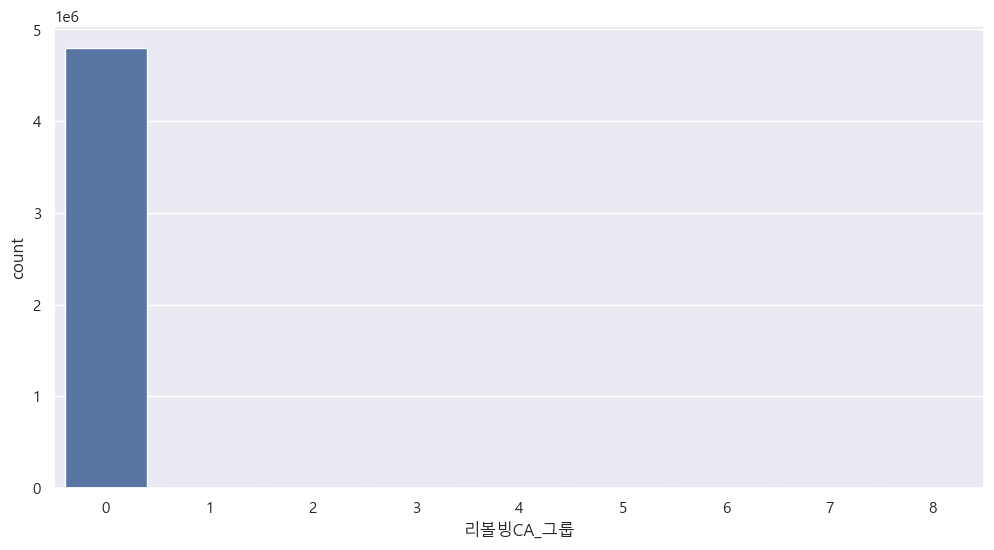

In [108]:
sns.countplot(x=df_temp['리볼빙CA_그룹'])

#### 잔액_카드론_B0M
- 잔액 카드론 (당월)

In [109]:
df_temp['잔액_카드론_B0M'].value_counts()

잔액_카드론_B0M
0         4499758
32910          55
22671          49
13686          48
14835          46
           ...   
155809          1
121582          1
69937           1
8490            1
87033           1
Name: count, Length: 54426, dtype: int64

In [110]:
df_temp['잔액_카드론_B0M'].describe()

count    4.800000e+06
mean     2.595097e+03
std      1.198638e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.465240e+05
Name: 잔액_카드론_B0M, dtype: float64

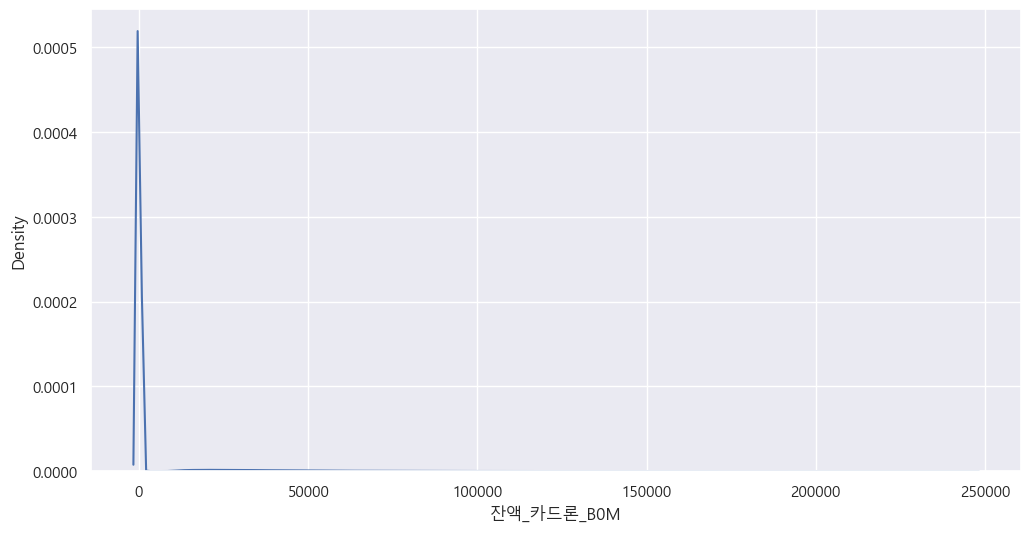

In [111]:
sns.kdeplot(x=df_temp['잔액_카드론_B0M'])
plt.show()

<Axes: xlabel='잔액_카드론_B0M'>

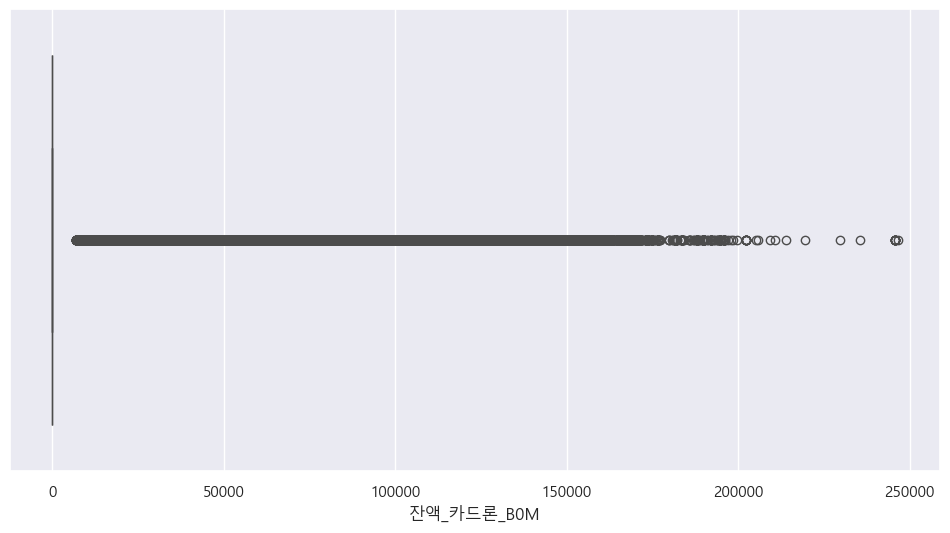

In [112]:
sns.boxplot(x=df_temp['잔액_카드론_B0M'])

#### 월중평잔_일시불_B0M
- 월 평균 잔액 일시불 (당월)

In [113]:
df_temp['월중평잔_일시불_B0M'].value_counts()

월중평잔_일시불_B0M
0        1282437
8           5190
7           5173
9           4869
10          3837
          ...   
67014          1
33741          1
47906          1
35639          1
42729          1
Name: count, Length: 44182, dtype: int64

In [114]:
df_temp['월중평잔_일시불_B0M'].describe()

count    4.800000e+06
mean     3.788691e+03
std      6.934577e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.443000e+03
75%      4.605000e+03
max      2.015160e+05
Name: 월중평잔_일시불_B0M, dtype: float64

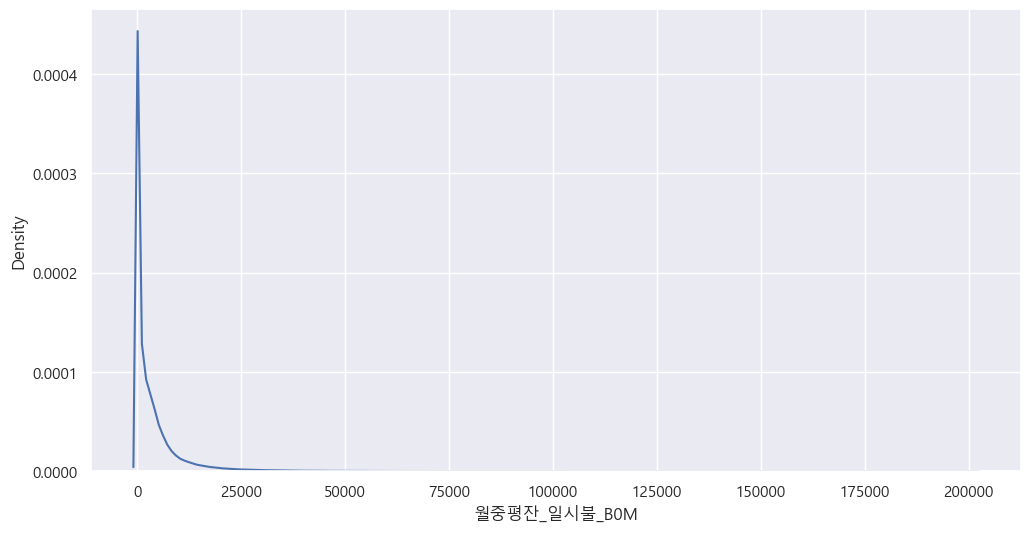

In [115]:
sns.kdeplot(x=df_temp['월중평잔_일시불_B0M'])
plt.show()

<Axes: xlabel='월중평잔_일시불_B0M'>

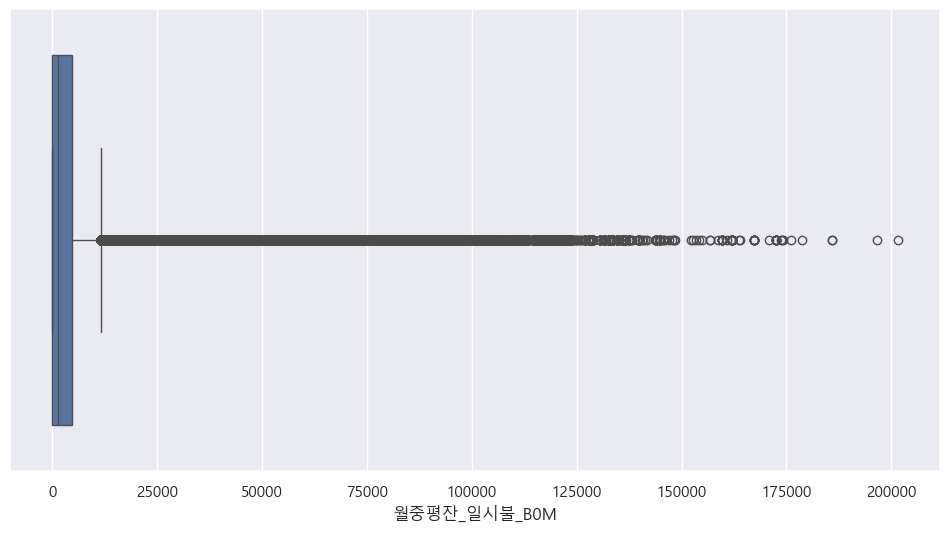

In [116]:
sns.boxplot(x=df_temp['월중평잔_일시불_B0M'])

#### 월중평잔_할부_B0M
- 월 평균 잔액 할부 (당월)

In [119]:
df_temp['월중평잔_할부_B0M'].value_counts()

월중평잔_할부_B0M
0        3051741
1226         647
1453         634
1247         629
1396         625
          ...   
55768          1
51845          1
42541          1
25856          1
67756          1
Name: count, Length: 37691, dtype: int64

In [120]:
df_temp['월중평잔_할부_B0M'].describe()

count    4.800000e+06
mean     2.126529e+03
std      6.218025e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.737000e+03
max      1.807770e+05
Name: 월중평잔_할부_B0M, dtype: float64

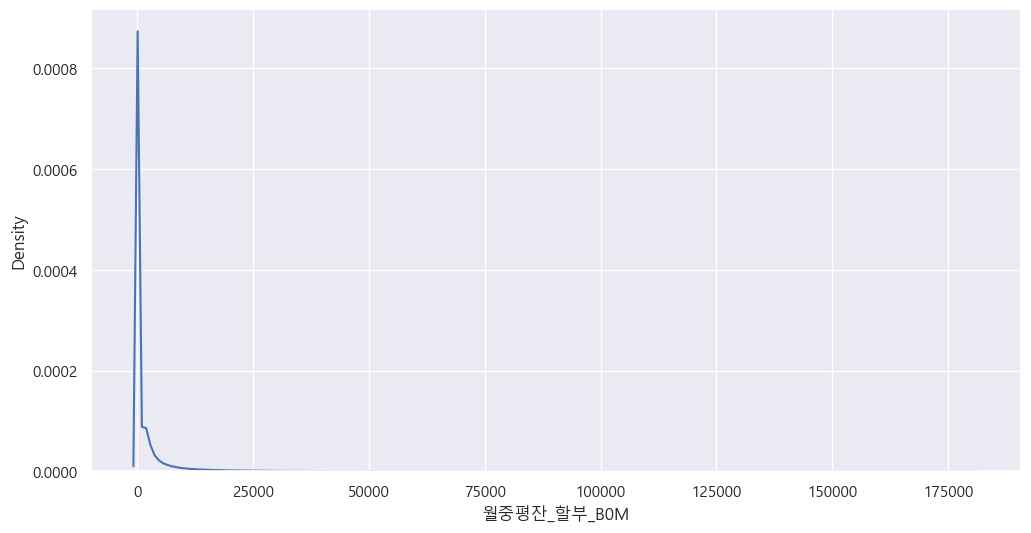

In [121]:
sns.kdeplot(x=df_temp['월중평잔_할부_B0M'])
plt.show()

<Axes: xlabel='월중평잔_할부_B0M'>

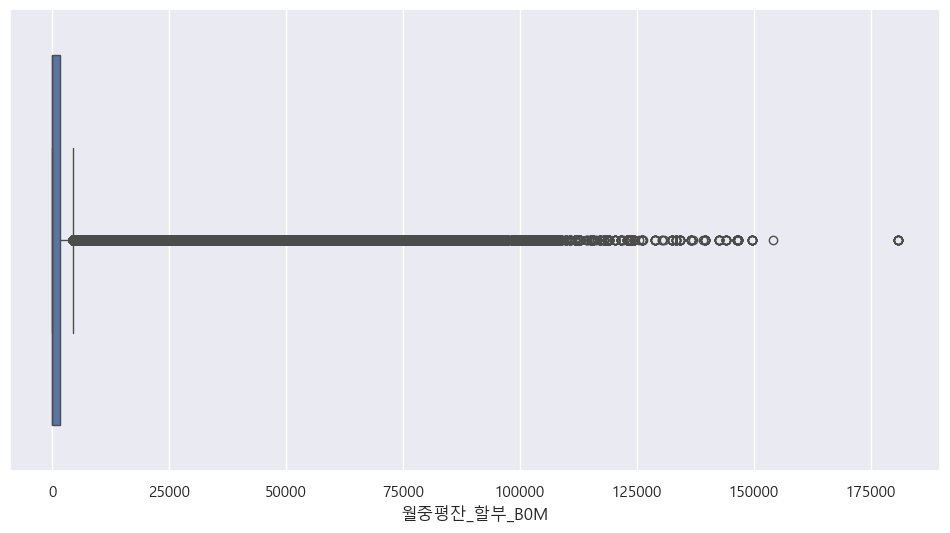

In [122]:
sns.boxplot(x=df_temp['월중평잔_할부_B0M'])

#### 월중평잔_CA_B0M
- 월 평잔 잔액 현금서비스 (당월)

In [123]:
df_temp['월중평잔_CA_B0M'].value_counts()

월중평잔_CA_B0M
0        4493214
2620         116
3194         115
4734         107
3399         103
          ...   
24734          1
21805          1
24343          1
27394          1
33447          1
Name: count, Length: 29577, dtype: int64

In [124]:
df_temp['월중평잔_CA_B0M'].describe()

count    4.800000e+06
mean     7.182417e+02
std      4.017121e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.112290e+05
Name: 월중평잔_CA_B0M, dtype: float64

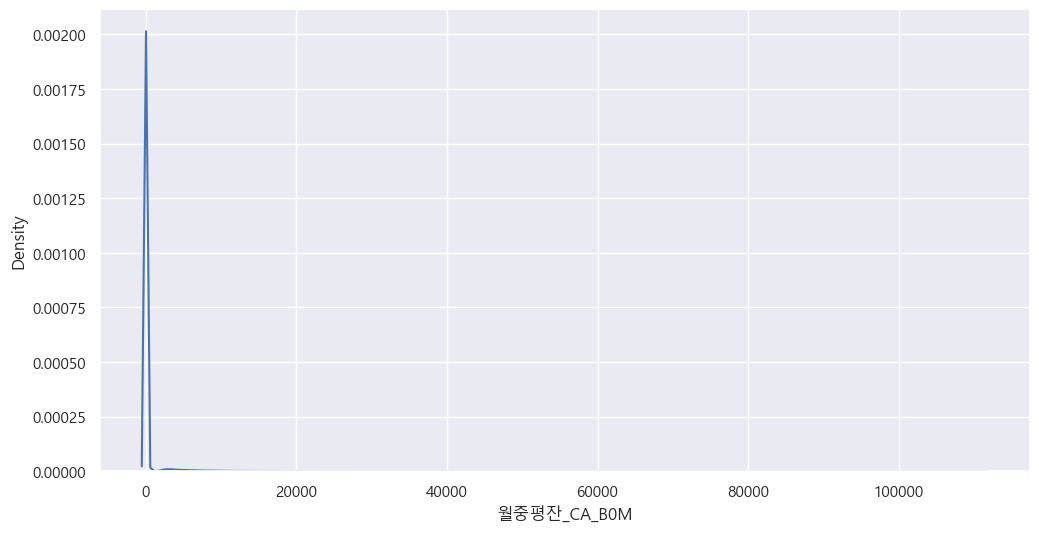

In [125]:
sns.kdeplot(x=df_temp['월중평잔_CA_B0M'])
plt.show()

<Axes: xlabel='월중평잔_CA_B0M'>

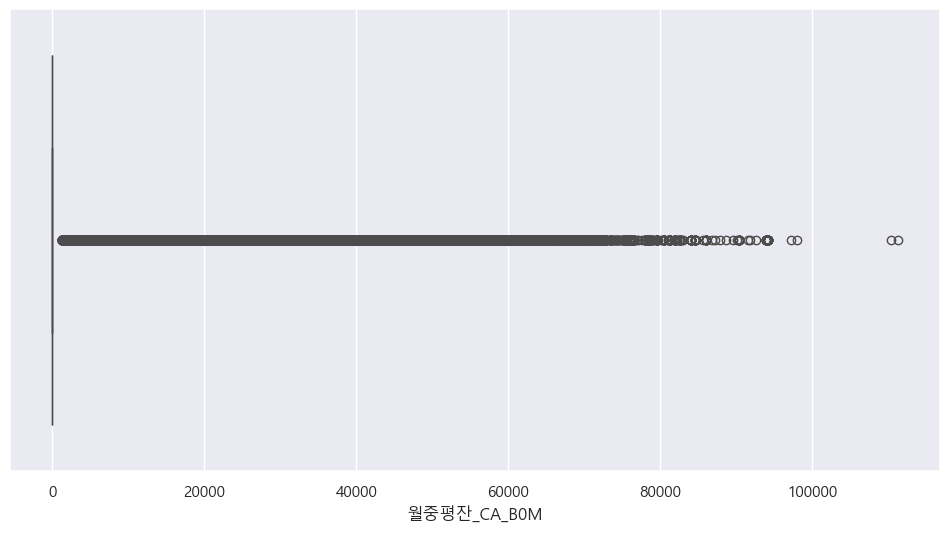

In [126]:
sns.boxplot(x=df_temp['월중평잔_CA_B0M'])

#### 카드론잔액_최종경과월 -> Drop
- 카드론 잔액 발생 이후 경과월

In [127]:
df_temp['카드론잔액_최종경과월'].value_counts()

카드론잔액_최종경과월
0    4800000
Name: count, dtype: int64

#### 연체일자_B0M (시계열) -> 다시 분석 해볼 필요가 있음
- 연체 발생 일자(당월)

In [141]:
df_temp['연체일자_B0M'].value_counts()

연체일자_B0M
20180505.0    612
20180424.0    495
20180507.0    477
20180430.0    468
20180509.0    434
             ... 
20180819.0      4
20180816.0      3
20180820.0      2
20180817.0      1
20180821.0      1
Name: count, Length: 137, dtype: int64

In [142]:
df_temp['연체일자_B0M'].describe()

count    1.834200e+04
mean     2.018050e+07
std      8.358707e+01
min      2.018041e+07
25%      2.018042e+07
50%      2.018050e+07
75%      2.018052e+07
max      2.018082e+07
Name: 연체일자_B0M, dtype: float64

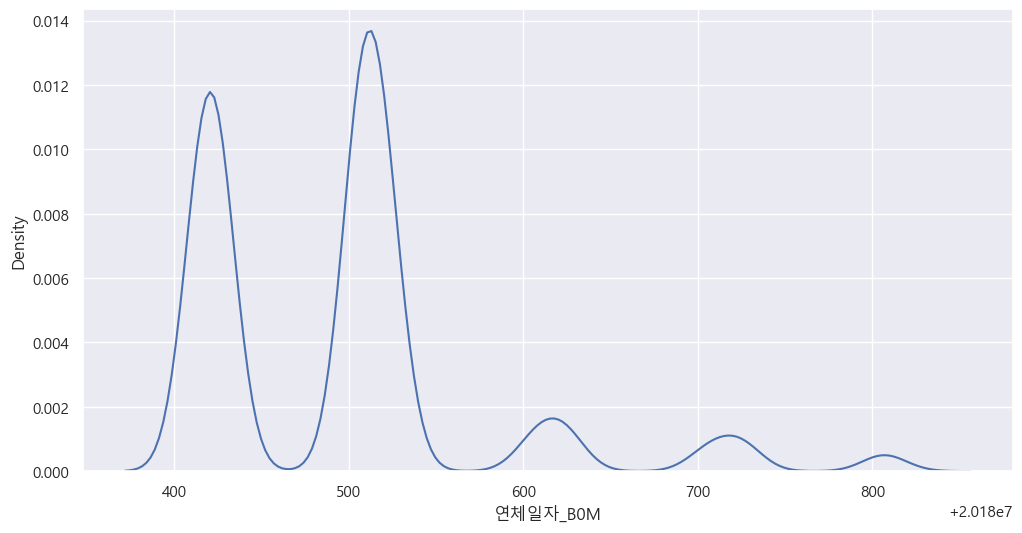

In [143]:
sns.kdeplot(x=df_temp['연체일자_B0M'])
plt.show()

<Axes: xlabel='연체일자_B0M'>

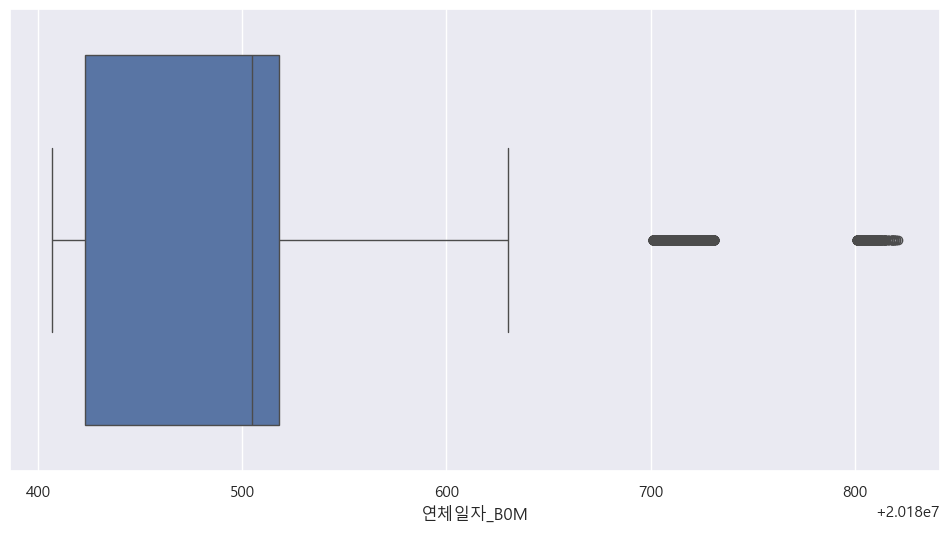

In [144]:
sns.boxplot(x=df_temp['연체일자_B0M'])

#### 연체잔액_B0M
- 연체 잔액 (당월)

In [145]:
df_temp['연체잔액_B0M'].value_counts()

연체잔액_B0M
0       4786294
1118         38
3524         37
1129         36
941          36
         ...   
2524          1
814           1
2271          1
3918          1
3334          1
Name: count, Length: 2048, dtype: int64

In [146]:
df_temp['연체잔액_B0M'].describe()

count    4.800000e+06
mean     1.721350e+01
std      5.071231e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.472500e+04
Name: 연체잔액_B0M, dtype: float64

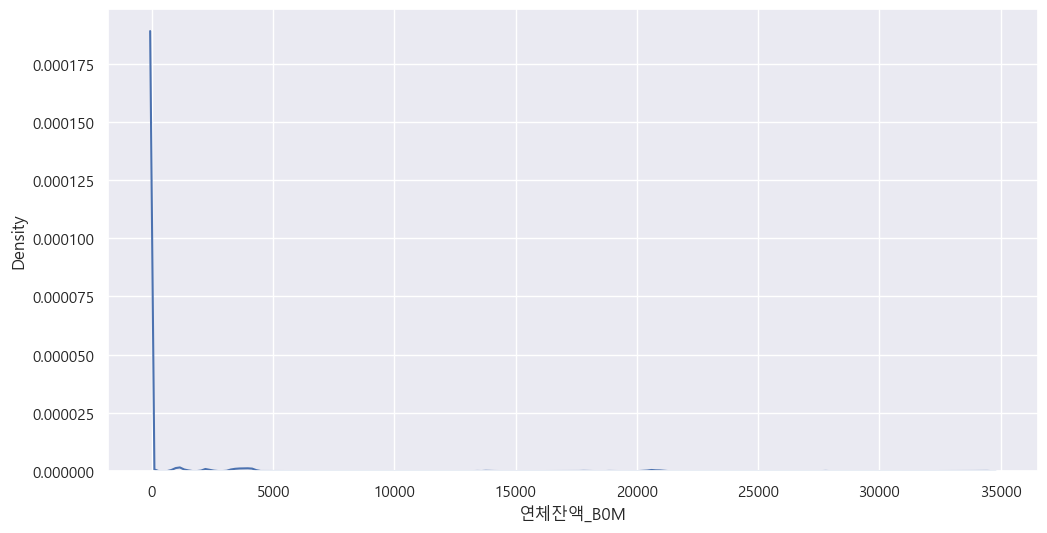

In [147]:
sns.kdeplot(x=df_temp['연체잔액_B0M'])
plt.show()

<Axes: xlabel='연체잔액_B0M'>

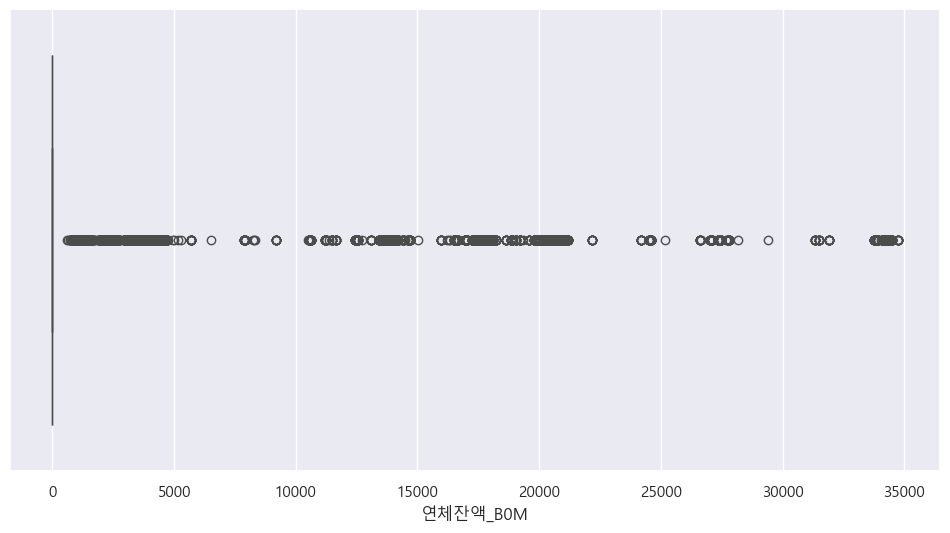

In [148]:
sns.boxplot(x=df_temp['연체잔액_B0M'])

#### 연체잔액_일시불_B0M
- 연체 잔액 일시불 (당월)

In [149]:
df_temp['연체잔액_일시불_B0M'].value_counts()

연체잔액_일시불_B0M
0       4788143
1354         65
1384         59
1118         58
1181         58
         ...   
854           1
1782          1
1520          1
780           1
1054          1
Name: count, Length: 860, dtype: int64

In [150]:
df_temp['연체잔액_일시불_B0M'].describe()

count    4.800000e+06
mean     3.207436e+00
std      6.535543e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.537000e+03
Name: 연체잔액_일시불_B0M, dtype: float64

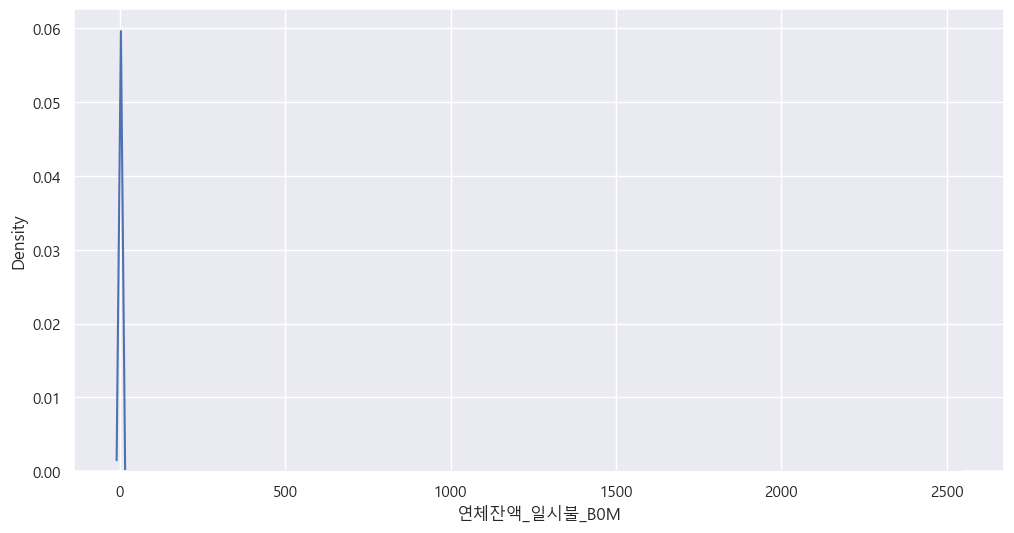

In [151]:
sns.kdeplot(x=df_temp['연체잔액_일시불_B0M'])
plt.show()

<Axes: xlabel='연체잔액_일시불_B0M'>

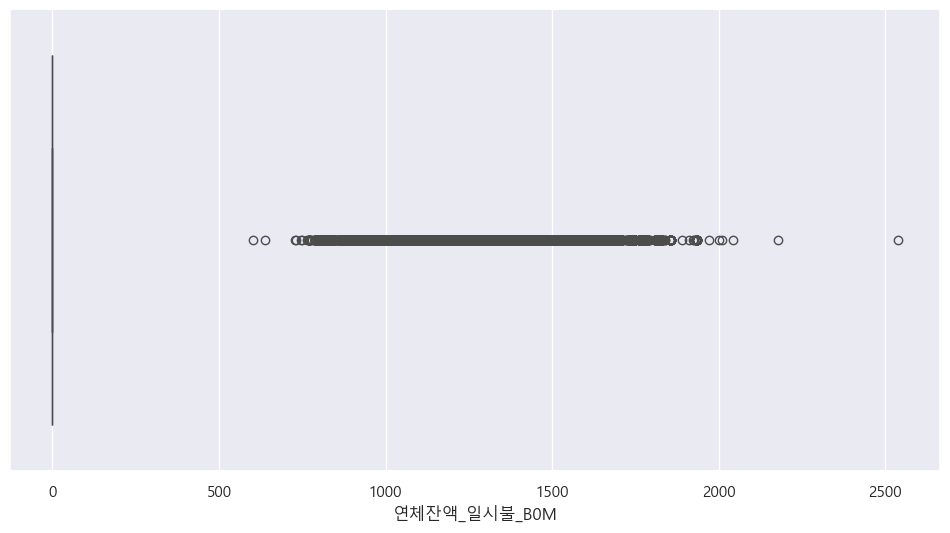

In [152]:
sns.boxplot(x=df_temp['연체잔액_일시불_B0M'])

#### 연체잔액_할부_B0M
- 연체 잔액 할부 (당월)

In [153]:
df_temp['연체잔액_할부_B0M'].value_counts()

연체잔액_할부_B0M
0       4790164
2288         59
2344         56
2460         50
2664         48
         ...   
2789          1
2071          1
2756          1
2192          1
2201          1
Name: count, Length: 791, dtype: int64

In [154]:
df_temp['연체잔액_할부_B0M'].describe()

count    4.800000e+06
mean     5.060011e+00
std      1.120749e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.325000e+03
Name: 연체잔액_할부_B0M, dtype: float64

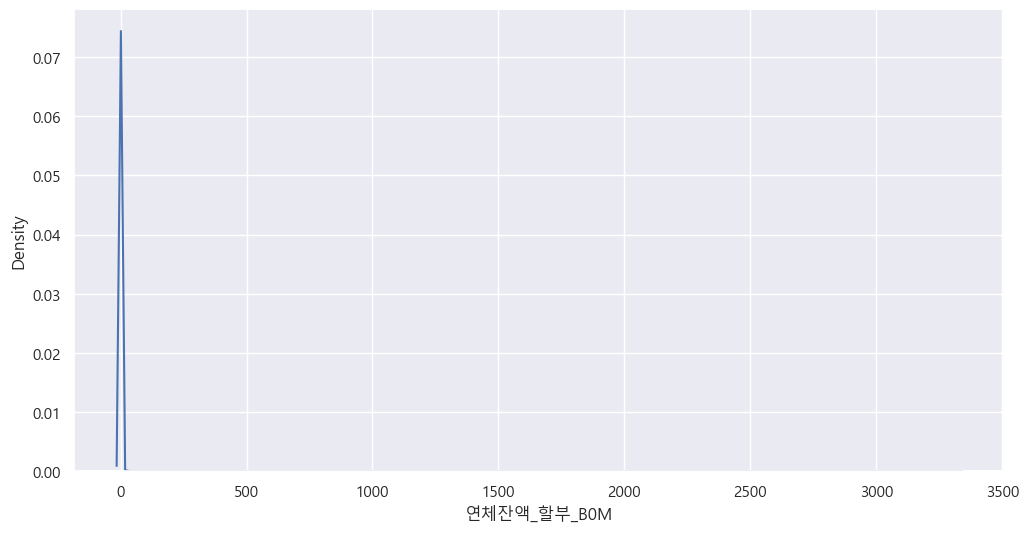

In [155]:
sns.kdeplot(x=df_temp['연체잔액_할부_B0M'])
plt.show()

<Axes: xlabel='연체잔액_할부_B0M'>

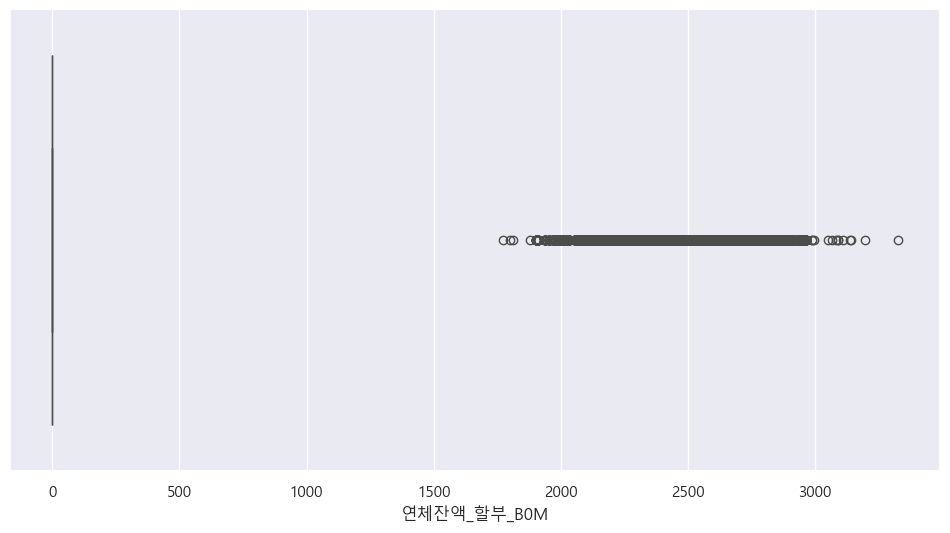

In [156]:
sns.boxplot(x=df_temp['연체잔액_할부_B0M'])

#### 연체잔액_현금서비스_B0M
- 연체 잔액 현금서비스 (당월)

In [157]:
df_temp['연체잔액_현금서비스_B0M'].value_counts()

연체잔액_현금서비스_B0M
0        4797727
16471         45
16378         45
16444         36
16422         36
          ...   
17252          1
10569          1
16543          1
16781          1
16548          1
Name: count, Length: 246, dtype: int64

In [158]:
df_temp['연체잔액_현금서비스_B0M'].describe()

count    4.800000e+06
mean     7.289214e+00
std      3.388918e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.524300e+04
Name: 연체잔액_현금서비스_B0M, dtype: float64

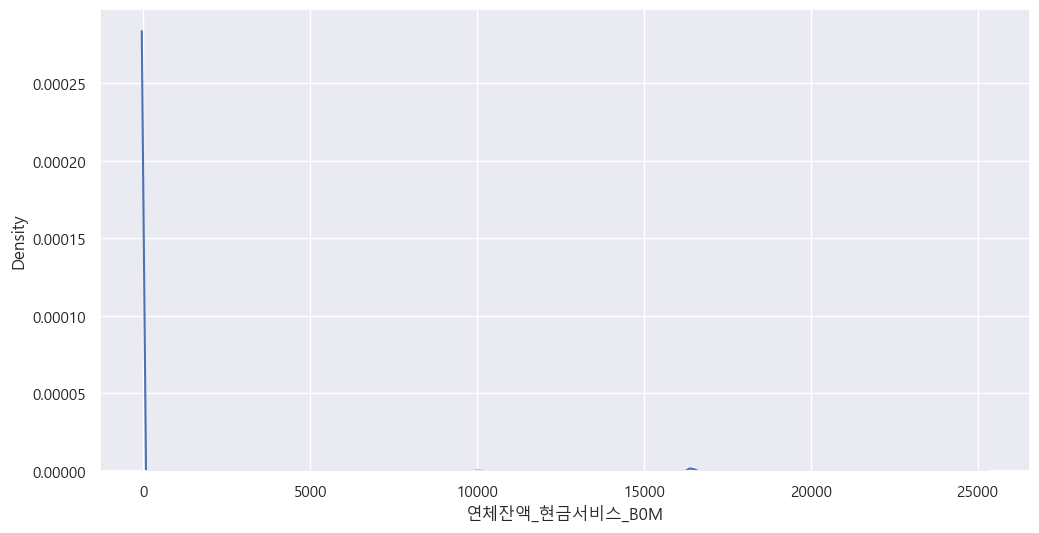

In [159]:
sns.kdeplot(x=df_temp['연체잔액_현금서비스_B0M'])
plt.show()

<Axes: xlabel='연체잔액_현금서비스_B0M'>

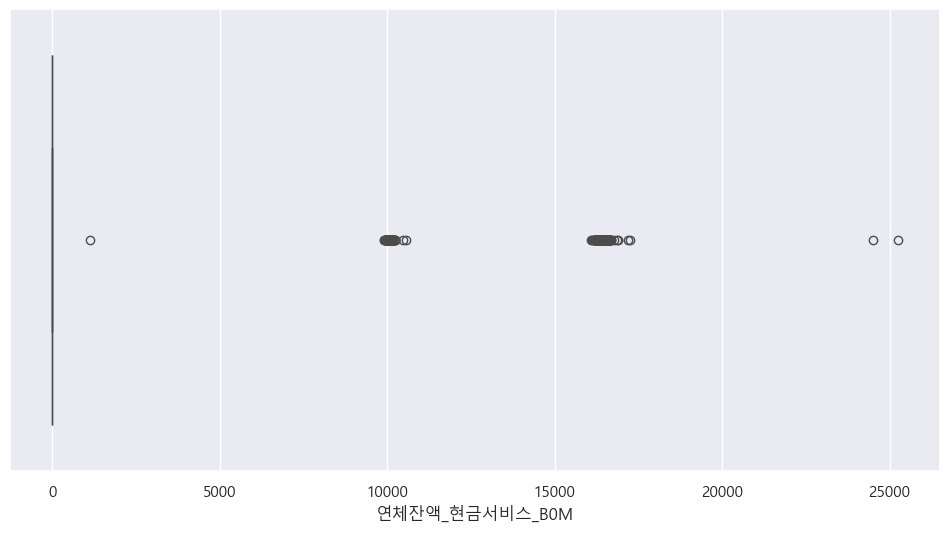

In [160]:
sns.boxplot(x=df_temp['연체잔액_현금서비스_B0M'])

#### 연체잔액_총합_B0M(파생변수)
 - 일시불 할부 현금서비스 합이 잔액과 같은지 확인

In [161]:
df_temp['연체잔액_총합_B0M'] = df_temp['연체잔액_일시불_B0M'] + df_temp['연체잔액_할부_B0M'] + df_temp['연체잔액_현금서비스_B0M']

In [163]:
df_temp['연체잔액_총합_B0M'].value_counts()

연체잔액_총합_B0M
0        4786342
4022          46
1118          38
1129          36
3967          36
          ...   
2071           1
2393           1
20506          1
2756           1
2671           1
Name: count, Length: 2023, dtype: int64

In [164]:
df_temp['연체잔액_총합_B0M'].describe()

count    4.800000e+06
mean     1.555666e+01
std      4.459744e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.941400e+04
Name: 연체잔액_총합_B0M, dtype: float64

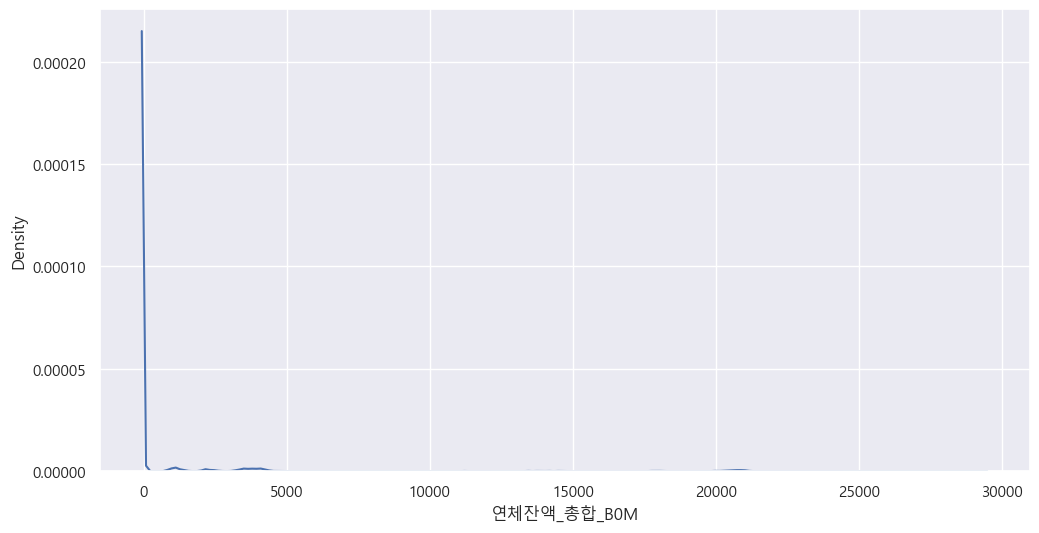

In [165]:
sns.kdeplot(x=df_temp['연체잔액_총합_B0M'])
plt.show()

<Axes: xlabel='연체잔액_총합_B0M'>

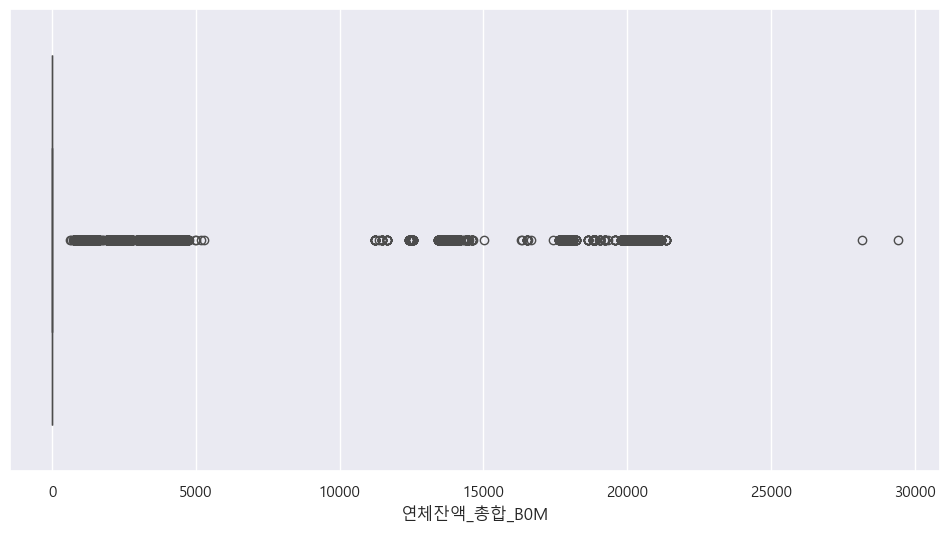

In [166]:
sns.boxplot(x=df_temp['연체잔액_총합_B0M'])

#### 연체차이_B0M(파생변수)
 - 연체잔액과 연체잔액_총합과의 차이로 정보량 차이 확인

In [172]:
df_temp['연체차이_B0M']= df_temp['연체잔액_B0M'] - df_temp['연체잔액_총합_B0M']

In [173]:
df_temp['연체차이_B0M'].value_counts()

연체차이_B0M
0        4794646
1           4433
2            258
13318         27
13310         18
          ...   
4196           1
13450          1
13637          1
13247          1
27663          1
Name: count, Length: 90, dtype: int64

In [174]:
df_temp['연체차이_B0M'].describe()

count    4.800000e+06
mean     1.656835e+00
std      1.537988e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.775200e+04
Name: 연체차이_B0M, dtype: float64

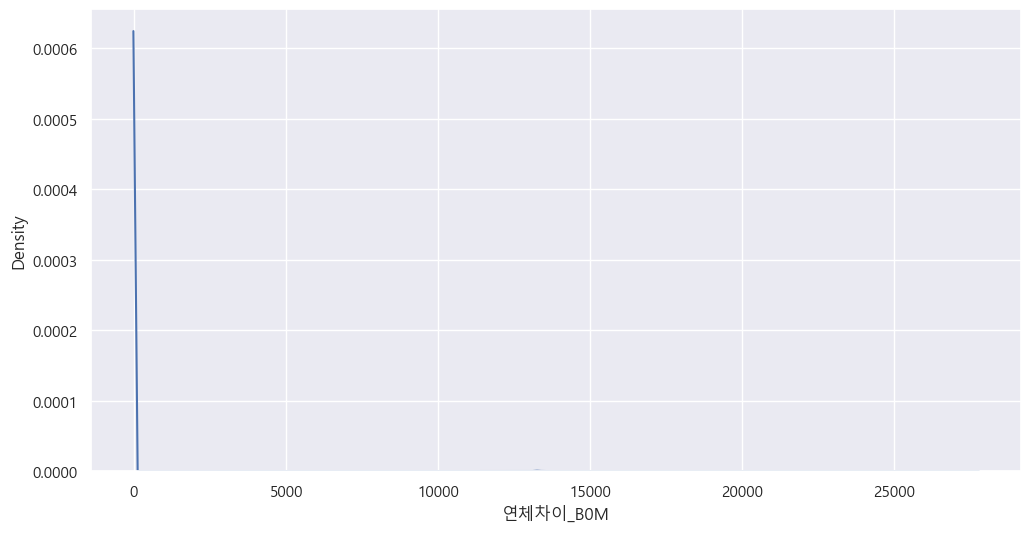

In [175]:
sns.kdeplot(x=df_temp['연체차이_B0M'])
plt.show()

<Axes: xlabel='연체차이_B0M'>

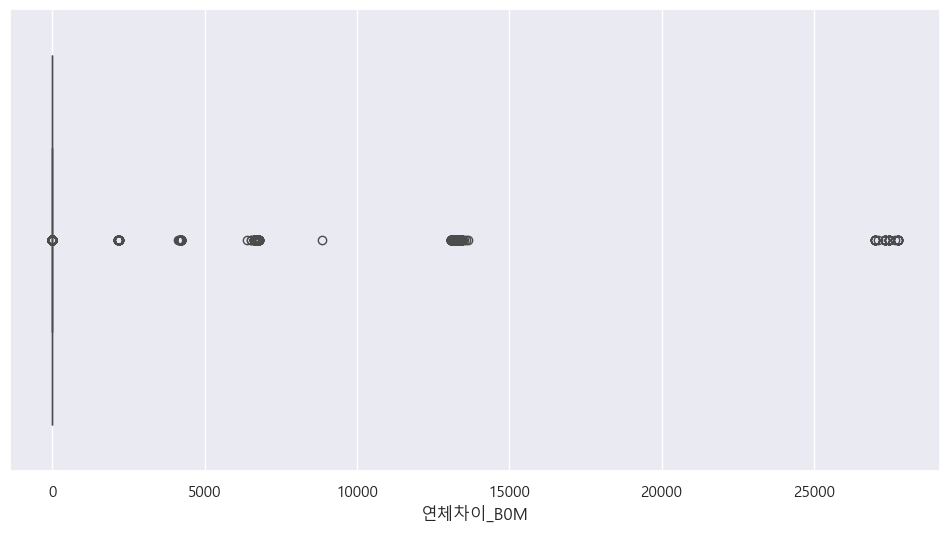

In [176]:
sns.boxplot(x=df_temp['연체차이_B0M'])

#### 연체일수_B1M
 - 연체 경과 일수 (전월기준)

In [129]:
df_temp['연체일수_B1M'].value_counts()

연체일수_B1M
-999999    4178090
 0          619625
 1            2285
Name: count, dtype: int64

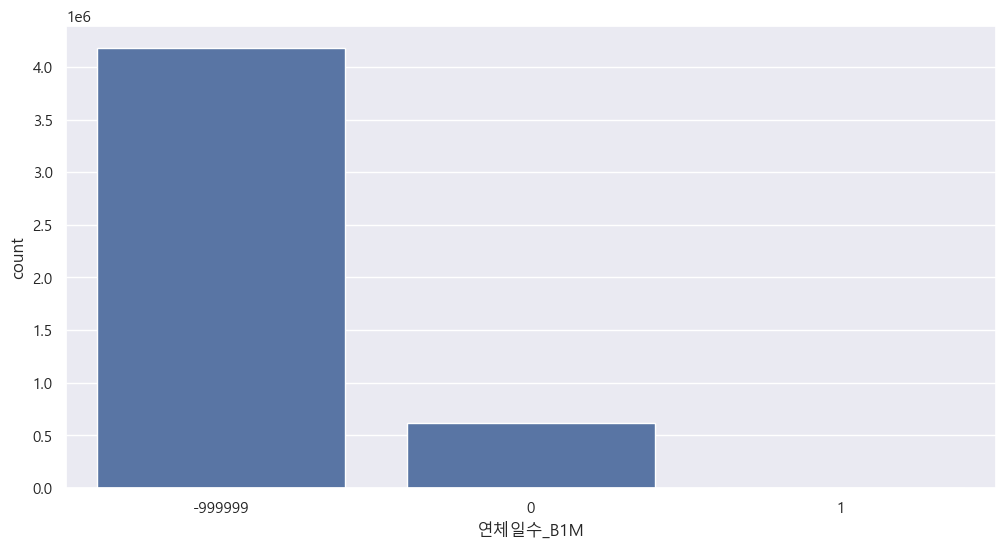

In [131]:
sns.countplot(x=df_temp['연체일수_B1M'])
plt.show()

#### 연체일수_B2M
 - 연체 경과 일수 (2전월기준)

In [132]:
df_temp['연체일수_B2M'].value_counts()

연체일수_B2M
-999999    4169136
 0          630163
 1             701
Name: count, dtype: int64

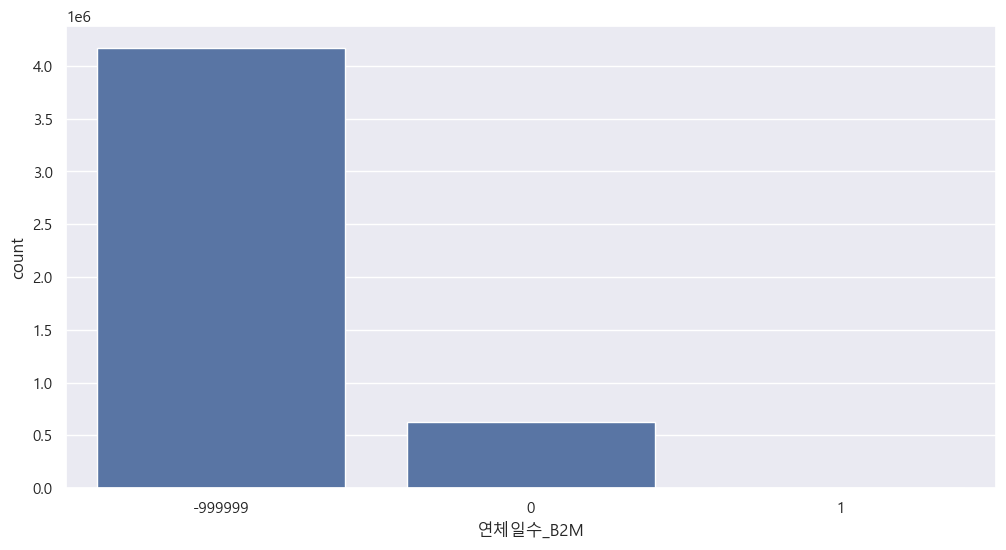

In [133]:
sns.countplot(x=df_temp['연체일수_B2M'])
plt.show()

#### 연체원금_B1M
 - 연체원금 (전월기준)

In [134]:
df_temp['연체원금_B1M'].value_counts()

연체원금_B1M
0       4761057
731          63
832          63
1101         63
1068         57
         ...   
1719          1
6541          1
4604          1
7731          1
4741          1
Name: count, Length: 5589, dtype: int64

In [137]:
df_temp['연체원금_B1M'].describe()

count    4.800000e+06
mean     2.882932e+01
std      4.338563e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.811600e+04
Name: 연체원금_B1M, dtype: float64

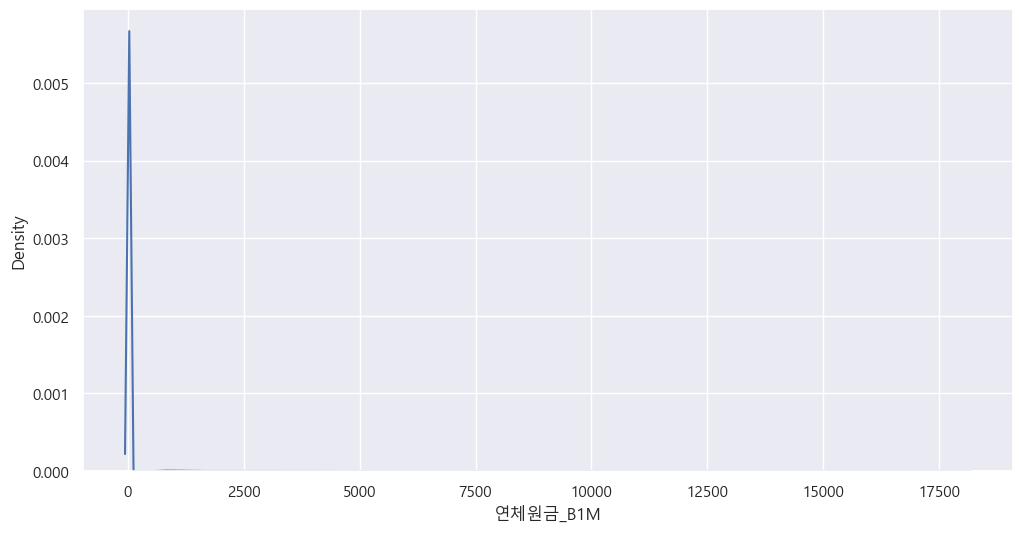

In [136]:
sns.kdeplot(x=df_temp['연체원금_B1M'])
plt.show()

#### 연체원금_B2M
 - 연체 경과 일수 (2전월기준)

In [138]:
df_temp['연체원금_B2M'].value_counts()

연체원금_B2M
0        4770201
1744          39
4072          37
1696          37
1767          37
          ...   
4772           1
7942           1
2534           1
12615          1
6367           1
Name: count, Length: 5883, dtype: int64

In [139]:
df_temp['연체원금_B2M'].describe()

count    4.800000e+06
mean     2.499725e+01
std      3.662939e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.811600e+04
Name: 연체원금_B2M, dtype: float64

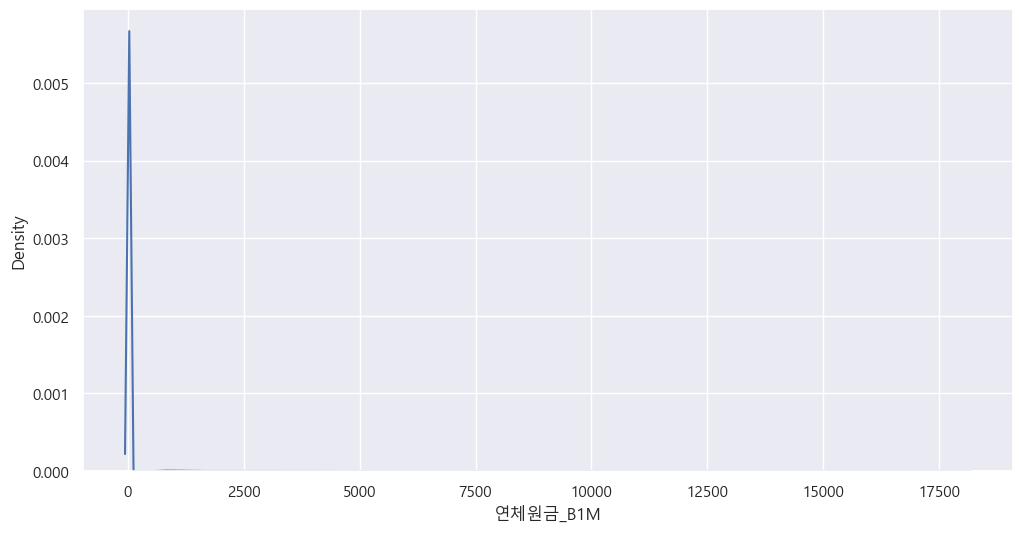

In [140]:
sns.kdeplot(x=df_temp['연체원금_B1M'])
plt.show()

#### 수치형 X 수치형

,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,카드론잔액_최종경과월,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
잔액_일시불_B0M,1.000000,0.147430,0.035313,0.547278,0.033908,0.029197,0.958477,0.099602,0.027827,NaN,...,0.879011,0.342811,0.634464,0.270195,0.107290,0.005925,0.026159,0.010251,0.024695,-0.419460
잔액_할부_B0M,0.147430,1.000000,0.119288,0.045616,-0.006878,0.106922,0.137257,0.928400,0.105548,NaN,...,0.112039,0.084222,0.065499,0.053715,0.873797,0.073679,0.105742,-0.002671,0.094622,-0.260857
잔액_현금서비스_B0M,0.035313,0.119288,1.000000,0.123532,0.073604,0.128414,0.025287,0.086849,0.973125,NaN,...,0.017859,-0.007162,0.083550,0.018846,0.089298,0.017603,0.938414,0.000322,0.125488,-0.265017
잔액_리볼빙일시불이월_B0M,0.547278,0.045616,0.123532,1.000000,0.147151,0.082439,0.520381,0.028001,0.106800,NaN,...,0.489298,0.105447,0.836038,0.289928,0.031269,0.001855,0.099592,-0.002702,0.080447,-0.068808
잔액_리볼빙CA이월_B0M,0.033908,-0.006878,0.073604,0.147151,1.000000,0.004410,0.024335,-0.005938,0.060102,NaN,...,0.030509,0.007753,0.101052,0.028674,-0.005889,-0.000720,0.054018,-0.000426,0.004233,-0.001048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
평잔_할부_해외_6M,0.005925,0.073679,0.017603,0.001855,-0.000720,0.014664,0.005305,0.072425,0.016887,NaN,...,0.008471,0.087382,0.004493,0.027322,0.071393,1.000000,0.017326,0.003433,0.013956,-0.026820
평잔_CA_6M,0.026159,0.105742,0.938414,0.099592,0.054018,0.109822,0.018674,0.078710,0.961422,NaN,...,0.013014,-0.004963,0.067326,0.015815,0.083570,0.017326,1.000000,0.000717,0.111854,-0.277397
평잔_CA_해외_6M,0.010251,-0.002671,0.000322,-0.002702,-0.000426,-0.003327,0.013041,-0.001666,0.003107,NaN,...,0.017090,0.077543,0.002857,0.028271,-0.001567,0.003433,0.000717,1.000000,-0.002819,-0.016221
평잔_카드론_6M,0.024695,0.094622,0.125488,0.080447,0.004233,0.928742,0.010707,0.076242,0.108998,NaN,...,0.007616,-0.010899,0.083667,0.033522,0.079083,0.013956,0.111854,-0.002819,1.000000,-0.046948


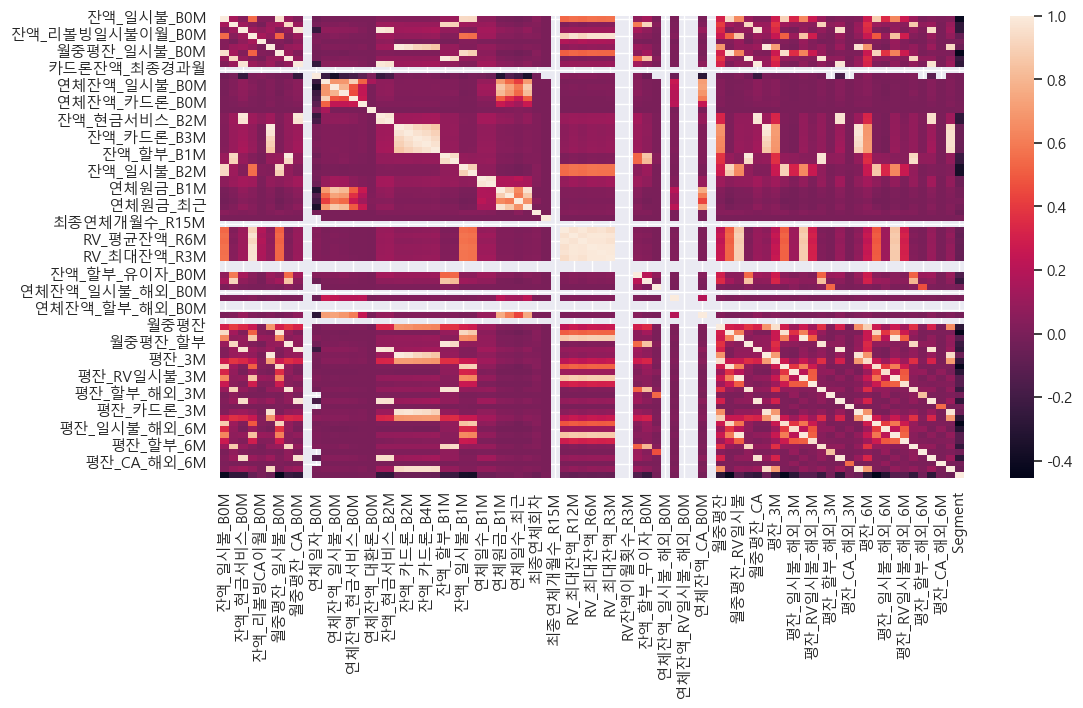

In [54]:
cor_data=df_temp.corr()
display(cor_data)
sns.heatmap(cor_data)
plt.show()

In [ ]:
col_list=list(df_temp.columns)

In [ ]:
temp=col_list[:16] + ['Segment']

In [ ]:
cor_data=df_temp[temp].corr()
display(cor_data)
sns.heatmap(cor_data)
plt.show()